<a href="https://colab.research.google.com/github/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/blob/master/R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


##<h1><b>1. Get Data </b></h1>

Download e leitura dos dados 

In [91]:
temp <- tempfile()
download.file("https://github.com/Mauricio-Sousa-Araujo/Aprendizado_Estatistico/raw/master/housing.zip",temp)
data <- read.csv(unz(temp, "housing.csv"))
unlink(temp)
summary(data)


   longitude         latitude     housing_median_age  total_rooms   
 Min.   :-124.3   Min.   :32.54   Min.   : 1.00      Min.   :    2  
 1st Qu.:-121.8   1st Qu.:33.92   1st Qu.:18.00      1st Qu.: 1447  
 Median :-118.4   Median :34.22   Median :29.00      Median : 2124  
 Mean   :-119.6   Mean   :35.62   Mean   :28.85      Mean   : 2631  
 3rd Qu.:-118.0   3rd Qu.:37.72   3rd Qu.:37.00      3rd Qu.: 3136  
 Max.   :-114.3   Max.   :41.95   Max.   :52.00      Max.   :39320  
                                                                    
 total_bedrooms     population      households     median_income    
 Min.   :   1.0   Min.   :    3   Min.   :   1.0   Min.   : 0.4999  
 1st Qu.: 296.0   1st Qu.:  787   1st Qu.: 280.0   1st Qu.: 2.5685  
 Median : 435.0   Median : 1164   Median : 409.0   Median : 3.5432  
 Mean   : 538.3   Mean   : 1423   Mean   : 499.9   Mean   : 3.8779  
 3rd Qu.: 647.0   3rd Qu.: 1721   3rd Qu.: 604.0   3rd Qu.: 4.7447  
 Max.   :6445.0   Max.   :35682   

##<h1><b>2. Criando os conjuntos de Test, Training e Validation.     </b></h1>


In [77]:
split_data = function (data,porcentagem,semente) {
    set.seed(semente)
    smp_size <- floor(porcentagem* nrow(data))    
    indices =  sample( seq_len(nrow(data)), size = smp_size )
    return ( list(data[indices, ],data[-indices,]) )
}

In [88]:
data_aux   <- split_data ( data , 0.85 ,1) 
data_train <- as.data.frame(data_aux[1])
data_test  <- as.data.frame(data_aux[2])

data_aux   <- split_data ( data , 0.80 ,2) 
data_train <- as.data.frame(data_aux[1])
data_val  <- as.data.frame(data_aux[2])

cat("Data Training possui : ", nrow(data_train),"instâncias\n")
cat("Data Validation possui : ", nrow(data_val),"instâncias\n")
cat("Data Test possui : ", nrow(data_test),"instâncias\n")


##<h1><b>3. Discover and Visualize the Data to Gain Insights</b></h1>




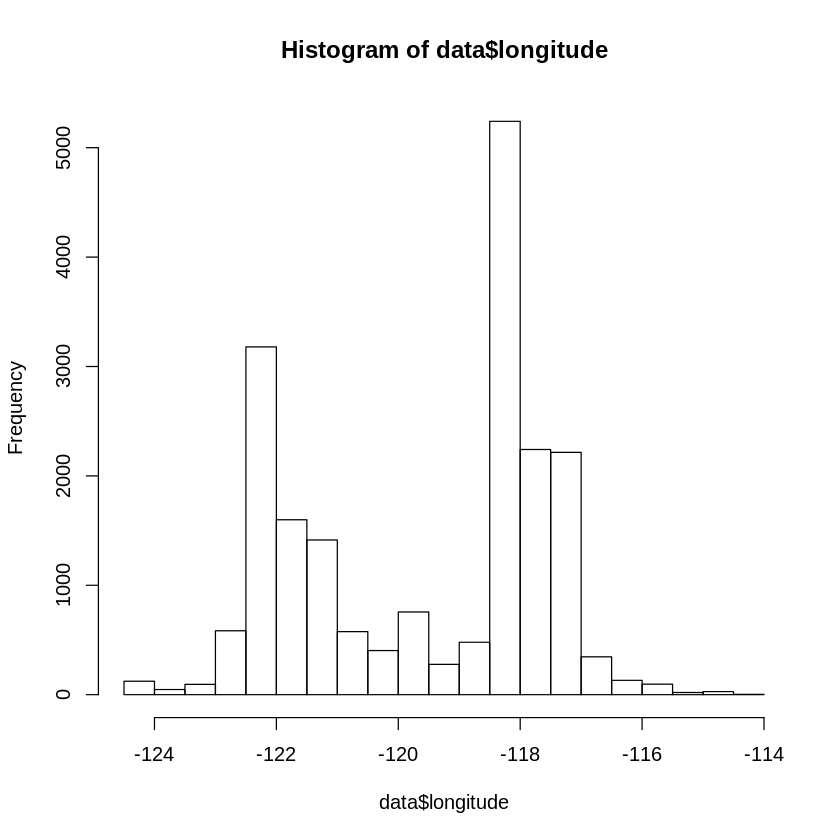

In [ ]:
hist(data$longitude)

In [ ]:
data$ocean_proximity <- NULL

In [96]:
data_aux <- data
data_aux$ocean_proximity <- NULL
cor(data_aux, method = c("pearson"))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.00000000,-0.92743812,-0.10941870,0.04459889,NA,0.101277884,0.056502671,-0.021798676,-0.05325806
latitude,-0.92743812,1.00000000,0.01246308,-0.03249653,NA,-0.107180029,-0.069317117,-0.067044576,-0.12998634
housing_median_age,-0.10941870,0.01246308,1.00000000,-0.36377647,NA,-0.298835326,-0.306125586,-0.117048396,0.10821481
total_rooms,0.04459889,-0.03249653,-0.36377647,1.00000000,NA,0.856454483,0.918014541,0.195886096,0.12918318
total_bedrooms,NA,NA,NA,NA,1,NA,NA,NA,NA
population,0.10127788,-0.10718003,-0.29883533,0.85645448,NA,1.000000000,0.906580344,0.001113295,-0.03097418
households,0.05650267,-0.06931712,-0.30612559,0.91801454,NA,0.906580344,1.000000000,0.009657114,0.06148881
median_income,-0.02179868,-0.06704458,-0.11704840,0.19588610,NA,0.001113295,0.009657114,1.000000000,0.68593890
median_house_value,-0.05325806,-0.12998634,0.10821481,0.12918318,NA,-0.030974177,0.061488808,0.685938896,1.00000000


In [95]:
data[1,]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,-122.23,37.88,41,880,129,322,126,8.3252,452600,NEAR BAY
